## CITS2402 - Introduction to Data Science - Assignment 1.

### Comparing Demographic Trends in Australian Census Data (2021 and 2016)

**Date:** August 2025.

## Declaration

This declaration should be completed and remain attached to the top of your submission.

*I/we am/are aware of the University’s [policy on academic conduct](https://www.uwa.edu.au/policy/-/media/project/uwa/uwa/policy-library/policy/student-administration/academic-integrity/academic-integrity-policy.doc) and I declare that this assignment is entirely the work of the author(s) listed below and that suitable acknowledgement has been made for any sources of information used in preparing it. I have retained a copy for my own records.*

- Name 1: David Do
- Student ID 1: 24224251
- Name 2: Jonathan Abraham
- Student ID 2: 24314826
- Name 3: Sacha Poulet
- Student ID 3: 24217543
- Date: 16/08/2025


The suffix `-template` should be replaced with the corresponding student numbers. For instance, if you are doing your assignment with another person, you should rename your file as `CITS2402-Assignment-STDNO1-STDNO2.ipynb`, where 'STDNO1' and 'STDNO2' are the corresponding student numbers involved in the submission.

<hr>


## Introduction

### Background and Research Question

In recent times, the qualifications that prospective employees are required or expected to have in Australia has increased with the Australian Bureau of Statistics (ABS) reporting a 19.8% increase in Australians having a non-school qualification between the 2016 and the 2021 Census (Australian Bureau of Statistics [ABS], 2022a). Before committing to potentially years of further education and accumulating student debt, a student should critically assess whether it is worthwhile pursuing further education depending on the industry they eventually want to work in.

Our team aims to simplify this process. Using data from the Australian population, we seek to answer the following question: *What trends exist between a person's highest non-school qualification and the industry they find themselves working in for males and females respectively and how has it changed from 2016 to 2021?* Our analysis maps highest non-school qualifications to industries of employment to inform those decisions. Additionally, the distribution of individuals possessing specific non-school qualifications varies significantly for males compared to females so it makes sense to consider the groups separately in our analysis. For instance, 41.1% of females had all their non-school qualifications at or above a bachelor degree according to the 2021 Census whereas only 35.6% of males did, according to the ABS (Australian Bureau of Statistics (ABS) 2022b).

### What Data is Used?

To answer the question, we use the Australian Bureau of Statistics (ABS) Census DataPack tables at the national geography (AUS) which amongst other things, provides data from various Australian Censuses. Specifically, we refer to the *Highest Non-School Qualification: Level of Education by Industry of Employment by Sex* table from the 2016 (G50A/B) and 2021 (G53A/B) Australian Censuses, as our primary dataset. These tables are split across three CSV files with the suffixes of A, B and C to distinguish them. E.g. from the 2016 Census, table G50 is stored across 2016Census_G49A_AUS.csv, 2016Census_G49B_AUS.csv and 2016Census_G49C_AUS.csv. Once the raw data is provided (steps to do so are described below), our notebook reproduces every step so the work is replicable.

Each of these CSV files is roughly (but not exactly) split into Males, Females and Persons so this should be accounted for during data cleaning and contains two rows of the same length (each item is separated by commas): headings and counts.

The 2016 and 2021 Censuses refer to the same headings and both segment the data into Males, Females and Persons so the headings row is the same in both G50 and G53, meaning the same data cleaning steps are performed for both tables. The only difference between the two tables is the counts.

Each heading in the first row of headings follows the structure: {Male, Female or Persons} _ {Industry} _ {Highest Non-School Qualification}. We only refer to the male and female categories because our main focus is determining the relationship within these groups. Note that there are no spaces in the actual heading names.  Each component of the heading is represented by a code defined in the metadata E.g. Male becomes M and Mining becomes Min. Some components are represented by codes representing categories whose names have a longer length so the codes contain underscores (e.g. Electricity, Gas, Water and Waste Services becomes EGW_WS).

The [ANZSIC Division level](https://www.dcceew.gov.au/environment/protection/npi/reporting/industry-reporting-materials/anzsic-code-list) industry categories used in the analysis are:
- Agriculture, Forestry and Fishing"
- Mining
- Manufacturing
- Electricity, Gas, Water and Waste Services
- Construction
- Wholesale Trade
- Retail Trade
- Accommodation and Food Services
- Transport, Postal and Warehousing
- Information Media and Telecommunications
- Financial and Insurance Services
- Rental, Hiring and Real Estate Services
- Professional, Scientific and Technical Services
- Administrative and Support Services
- Public Administration and Safety
- Education and Training
- Health Care and Social Assistance
- Arts and Recreation Services
- Other Services

The highest non-school qualification categories used in the analysis are:
- Postgraduate Degree Level
- Graduate Diploma and Graduate Certificate Level
- Bachelor Degree Level
- Advanced Diploma and Diploma Level
- Certificate Level (1|2|3|4)

Each count in the second row of counts refers to the unit of measure of the number of people at the time of the Census under a specific heading. While there is an "Inadequately described/Not stated" column provided, we exclude this from the analysis and since no counts have failed to be provided (i.e. no ",," in the CSV files indicating the absence of a count), we do not need to consider data imputation methods.

### How to Obtain the Data?




To obtain the primary dataset referred to in this analysis, do the following:
1.   Go to the ABS website then select Census -> Find Census Data -> Census Data Tools -> DataPacks or click the following link: [ABS: Census DataPacks](https://www.abs.gov.au/census/find-census-data/datapacks).
2.   Set the DataPack type to General Community Profile, Geography to Australia and Census year to 2016 then download the singular zip file (approximately 5 MB).
3.   Repeat step 2 but change the Census year to 2021.
4.   Extract both zip files, storing them in a folder called "CENSUS DATA". The code in this report will only look at the G50 and the G53 CSV files from "2016" and "2021" respectively so you can remove all the other files (e.g. tables, metadata, readme, etc) to save storage but this is not required for the code to work. Ensure you do not rename the relevant CSV files.
5. Upload the "CENSUS DATA" folder to your My Drive folder on your Google Drive.

### Limitations, Assumptions and Differences

Limitations of the data:
- The persons columns does not equal the sum of male and female but we only consider data for males and females in our analysis but we only consider the male and female data.
- People whose highest qualification is school only are outside these categories.
- The presence of the “Inadequately described/Not stated” category which is filtered out during data cleaning.
- Table totals differ from the sums of rows and columns due to random changes made to protect the privacy of data.
- Small coding/collection differences and events (e.g. COVID around 2021) may shift totals independently of education.
- This report was written in 2025 whereas the data being referred to was from the 2016 and 2021 Census, meaning the reliability of claims made in this report could differ from the current situation.

Assumptions made in this analysis:
- The domain of discourse of this report is employed persons in the Census.
- Highest non-school qualification is correctly captured and comparable across years of which people with no non-school qualifications are outside scope
- ABS applies small random adjustments and rounding to protect privacy; we assume these are negligible for shares and trends.
- Dropping "Inadequately described/Not stated" data does not materially bias industry or qualification shares among the remaining records.
- Totals equals the sum of the relevant row/s or column/s rather than using the value provided in the CSV file.
- There have not been significant changes between 2021 and 2025 to compromise the usefulness of our results.

Differences between the 2016 and 2021 tables:
- 2016 uses G50A and G50B and 2021 uses G53A and G53B to refer to the same table.
- The total count of individuals in the 2021 Census exceeds the 2016 Census so we refer to proportions rather than raw counts when making comparisons.

## Data Cleaning

So far, we have defined the question we seek to answer and provided a comprehensive description of the data used in this report. Now, we are ready to extract and clean the data, assuming you have successfully obtained the data and uploaded in to your MyDrive folder on your Google Drive in the prescribed format.

The code cells below sources the relevant data from the DataPacks and performs comprehensive cleaning of the data, with the final result being four Industry x Qualification contingency tables (represented by Pandas DataFrames): males 2016, females 2016, males 2021 and females 2021.

### Setup

The first task is to configure this notebook to access the datapacks containing our dataset, demonstrated by the code cells below.

In [ ]:
# Mount drive to access DataPacks downloaded to Google Drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing all the necessary libraries used in this report
import pandas as pd
import statsmodels as stml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import os
from IPython.display import display

In [ ]:
# Get base path to folder storing DataPacks
base_path = "/content/drive/MyDrive/CENSUS DATA"

### Source Data

The next step is to read the data into this notebook. The code below recursively searches the "CENSUS DATA" directory to obtain the data files, corresponding to G50 and G53 for 2016 and 2021 respectively.

In [ ]:
# Get filepaths given a base path
def get_filepaths(path):
  filepaths = []

  for root, dir_, files in os.walk(path):
    for file_ in sorted(files):
      year, file_id = file_.split("_")[:2]
      year = year[:4]
      file_id_prefix = file_id[:-1]

      # We are only interested in G50 and G53 CSV files from 2016 and 2021 respectively
      if year == "2016" and file_id_prefix == "G50" or year == "2021" and file_id_prefix == "G53":
          filepaths.append(f"{root}/{file_}")

  return filepaths

# Read the contents of the relevant files into a files dictionary
def read_files(filepaths):
  files = {}

  # Organise the data by year and store two lists under each year for headings and counts respectively
  for filepath in filepaths:
    year, file_id = filepath.split('/')[-1].split('_')[:2]
    year = year[:4]

    with open(filepath) as f:
      headings, counts = f.read().splitlines()
      if year not in files.keys():
        files[year] = [[], []]
      files[year][0].extend([heading.split('_') for heading in headings.split(',')[1:]])
      files[year][1].extend(list(map(int, counts.split(',')[1:])))

  return files

### Parse Data Into Dictionary

Now, the data needs to be re-organised and filtered so only the relevant information remains with headings and counts separated, in a more suitable format. A nested dictionary is chosen here as it can be directly converted into a Pandas DataFrame.

In [ ]:
# For each year, split the data into male and female and filter out person (code P) data
def split_data(data):
  new_data = {}

  for year, [headings, counts] in data.items():
    new_data[year] = {"Male": [[], []], "Female": [[], []]}

    for idx in range(len(headings)):
      if headings[idx][0].upper() == 'M':
        new_data[year]["Male"][0].append(headings[idx][1:])
        new_data[year]["Male"][1].append(counts[idx])

      elif headings[idx][0].upper() == 'F':
        new_data[year]["Female"][0].append(headings[idx][1:])
        new_data[year]["Female"][1].append(counts[idx])

  return new_data

# Expand heading token abbreviations for readability in the subsequent dataframes
def expand_heading(heading):
  processed_heading = []
  new_heading = []

  # The codes mapped to their meaning for the industries we are interested in
  IND_LABEL = {
    "AgriForestFish":"Agriculture, Forestry & Fishing",
    "Min":"Mining",
    "Mnfg":"Manufacturing",
    "Cnstn":"Construction",
    "WTrade":"Wholesale Trade",
    "RTrade":"Retail Trade",
    "AccomFoodS":"Accommodation & Food Services",
    "TransPostWhse":"Transport, Postal & Warehousing",
    "InfoMedTelecom":"Information Media & Telecoms",
    "FinInsurS":"Financial & Insurance Services",
    "RentHirREserv":"Rental, Hiring & Real Estate Services",
    "ProScieTechServ":"Professional, Scientific & Technical Services",
    "AdminSupServ":"Administrative & Support Services",
    "PubAdmiSafety":"Public Administration & Safety",
    "EducTrain":"Education & Training",
    "HealthCareSocA":"Health Care & Social Assistance",
    "ArtRecServ":"Arts & Recreation Services",
    "OthServ":"Other Services",
    "EGW_WS":"Electricity, Gas, Water & Waste Services"
  }

  # The codes mapped to their meaning for the qualifications we are interested in
  EDU_SUFFIX = {
      "PD":"Postgraduate degree",
      "GD_GC":"Graduate Diploma/Certification",
      "BD":"Bachelor degree",
      "AdD_D":"Advanced Diploma/Diploma Level",
      "Cert":"Certificate (I/II/III/IV)"
  }

  for idx in range(len(heading)):
    if heading[idx] == "WS" or heading[idx] == "GC" or heading[idx] == 'D':
      continue

    if heading[idx] == "EGW":
      processed_heading.append(heading[idx] + '_' + heading[idx + 1])

    elif heading[idx] == "GD" or heading[idx] == "AdD":
      processed_heading.append(heading[idx] + '_' + heading[idx + 1])

    else:
      processed_heading.append(heading[idx])

  for idx in range(len(processed_heading)):
    if idx == 0:
      new_heading.append(IND_LABEL[processed_heading[idx]])

    elif idx == 1:
      new_heading.append(EDU_SUFFIX[processed_heading[idx]])

  return new_heading

# Parse the data, expanding abbreviations and removing unnecessary columns from headings and the corresponding ones in counts
def clean_data(data):
  cleaned_data = {"2016":  {"Male": [[], []], "Female": [[], []]}, "2021":  {"Male": [[], []], "Female": [[], []]}}

  for year, genders_data in data.items():
      for gender, [headings, counts] in genders_data.items():
        for idx in range(len(headings)):
          lwr_heading = [token.lower() for token in headings[idx]]
          not_allowed_tokens = ["tot", "id", "ns"] # Not interested in these columns
          add_heading = True

          for not_allowed_token in not_allowed_tokens:
            if not_allowed_token in lwr_heading:
              add_heading = False

          if add_heading:
            cleaned_data[year][gender][0].append(expand_heading(headings[idx]))
            cleaned_data[year][gender][1].append(counts[idx])

  return cleaned_data

### Get Contingency Tables

The final task is to convert the data dictionaries from the last step into contingency tables represented by Pandas DataFrames. Contingency tables are a very useful way to represent frequencies of combinations of values of two categorical variables so these will be referred to heavily during analysis.

In [ ]:
# Convert the data dictionaries into Industry x Qualification DataFrames
def dict_to_df(data_dict):
  dfs = {"2016":  {"Male": None, "Female": None}, "2021":  {"Male": None, "Female": None}}

  for year, genders_data in cleaned_data.items():
    for gender, [headings, counts] in genders_data.items():
      industries = [heading[0] for heading in headings]
      qualifications = [heading[1] for heading in headings]
      data = {
          "Industry": industries,
          "Qualification": qualifications,
          "Count": counts
      }

      dfs[year][gender] = pd.DataFrame(data).pivot(index="Qualification", columns="Industry", values="Count")

      # Add total column and row
      dfs[year][gender]["Total"] = dfs[year][gender].sum(axis=1)
      dfs[year][gender].loc[len(dfs[year][gender])] = dfs[year][gender].sum()
      dfs[year][gender] = dfs[year][gender].rename(index={dfs[year][gender].index[-1]: "Total"})

  return dfs

### Result

The below code cells call the functions defined earlier to generate four contingency tables, which display absolute counts corresponding to combinations of values of qualification levels to industries of employment. The data is now much more straightforward to analyse that in its raw form.

In [ ]:
# Call the functions defined previously to generate clean DataFrames
filepaths = get_filepaths(base_path)
data = split_data(read_files(filepaths))
cleaned_data = clean_data(data)
dfs = dict_to_df(cleaned_data)

In [ ]:
# Dataframe for males in 2016
# Please note that the table is split into 3 in the output below so the whole table can be viewed in PDF format
length = len(dfs["2016"]["Male"].columns)
third = length // 3
two_third = (2 * length) // 3
print("2016 - Male:")

display(dfs["2016"]["Male"].iloc[:, :third])
display(dfs["2016"]["Male"].iloc[:, third:two_third])
display(dfs["2016"]["Male"].iloc[:, two_third:])

# Comment the last three lines above and uncomment the line below to see the whole table
# display(dfs["2016"]["Male"])

2016 - Male:


Industry,Accommodation & Food Services,Administrative & Support Services,"Agriculture, Forestry & Fishing",Arts & Recreation Services,Construction,Education & Training
Qualification,,,,,,
Advanced Diploma/Diploma Level,34405,16936,13253,9984,47258,21274
Bachelor degree,39791,25628,14051,18285,51790,92287
Certificate (I/II/III/IV),69815,46054,49302,20107,421114,28199
Graduate Diploma/Certification,1649,2010,1018,1639,2842,21971
Postgraduate degree,9358,7188,2805,4480,10172,60097
Total,155018,97816,80429,54495,533176,223828


Industry,"Electricity, Gas, Water & Waste Services",Financial & Insurance Services,Health Care & Social Assistance,Information Media & Telecoms,Manufacturing,Mining,Other Services
Qualification,,,,,,,
Advanced Diploma/Diploma Level,9973,27606,33811,13812,40913,10709,15424
Bachelor degree,13692,68518,101303,31289,57035,19321,19409
Certificate (I/II/III/IV),33142,16923,45881,19341,184677,66392,113169
Graduate Diploma/Certification,1459,7366,12048,2662,4042,1853,2138
Postgraduate degree,5826,26820,43486,11034,17425,6829,7337
Total,64092,147233,236529,78138,304092,105104,157477


Industry,"Professional, Scientific & Technical Services",Public Administration & Safety,"Rental, Hiring & Real Estate Services",Retail Trade,"Transport, Postal & Warehousing",Wholesale Trade,Total
Qualification,,,,,,,
Advanced Diploma/Diploma Level,46710,61626,12215,34862,37208,18491,506470
Bachelor degree,185161,80011,18364,57323,38814,31179,963251
Certificate (I/II/III/IV),42880,91020,24034,103612,102396,53809,1531867
Graduate Diploma/Certification,16070,15104,1607,3099,3389,2240,104206
Postgraduate degree,70598,34698,5330,15727,12818,10717,362745
Total,361419,282459,61550,214623,194625,116436,3468539


In [ ]:
# Dataframe for males in 2021
# Please note that the table is split into 3 in the output below so the whole table can be viewed in PDF format
length = len(dfs["2021"]["Male"].columns)
third = length // 3
two_third = (2 * length) // 3
print("2021 - Male:")

display(dfs["2021"]["Male"].iloc[:, :third])
display(dfs["2021"]["Male"].iloc[:, third:two_third])
display(dfs["2021"]["Male"].iloc[:, two_third:])
# Comment the last three lines above and uncomment the line below to see the whole table
# display(dfs["2021"]["Male"])

2021 - Male:


Industry,Accommodation & Food Services,Administrative & Support Services,"Agriculture, Forestry & Fishing",Arts & Recreation Services,Construction,Education & Training
Qualification,,,,,,
Advanced Diploma/Diploma Level,39764,19561,14639,10290,60409,21521
Bachelor degree,44821,31375,17954,21563,74919,100120
Certificate (I/II/III/IV),69955,48472,52682,19783,461079,30589
Graduate Diploma/Certification,2016,2424,1281,1850,4018,22188
Postgraduate degree,13642,10659,4126,5852,18646,74385
Total,170198,112491,90682,59338,619071,248803


Industry,"Electricity, Gas, Water & Waste Services",Financial & Insurance Services,Health Care & Social Assistance,Information Media & Telecoms,Manufacturing,Mining,Other Services
Qualification,,,,,,,
Advanced Diploma/Diploma Level,10813,27861,43300,12602,43824,13084,17763
Bachelor degree,17804,90930,134643,33985,68077,23884,23085
Certificate (I/II/III/IV),35257,17390,61389,15564,179457,78281,114590
Graduate Diploma/Certification,1822,9741,16900,2634,4700,2352,2535
Postgraduate degree,8194,38691,70831,12706,24651,9659,9958
Total,73890,184613,327063,77491,320709,127260,167931


Industry,"Professional, Scientific & Technical Services",Public Administration & Safety,"Rental, Hiring & Real Estate Services",Retail Trade,"Transport, Postal & Warehousing",Wholesale Trade,Total
Qualification,,,,,,,
Advanced Diploma/Diploma Level,50740,67717,12834,39342,46144,19299,571507
Bachelor degree,235043,98745,22331,70898,54692,34812,1199681
Certificate (I/II/III/IV),44188,96820,23754,102182,106818,56589,1614839
Graduate Diploma/Certification,20785,17441,1812,4063,4291,2456,125309
Postgraduate degree,102091,46972,7280,24968,22086,13350,518747
Total,452847,327695,68011,241453,234031,126506,4030083


In [ ]:
# Dataframe for females in 2016
# Please note that the table is split into 3 in the output below so the whole table can be viewed in PDF format
length = len(dfs["2016"]["Female"].columns)
third = length // 3
two_third = (2 * length) // 3
print("2016 - Female:")

display(dfs["2016"]["Female"].iloc[:, :third])
display(dfs["2016"]["Female"].iloc[:, third:two_third])
display(dfs["2016"]["Female"].iloc[:, two_third:])
# Comment the last three lines above and uncomment the line below to see the whole table
# display(dfs["2016"]["Female"])

2016 - Female:


Industry,Accommodation & Food Services,Administrative & Support Services,"Agriculture, Forestry & Fishing",Arts & Recreation Services,Construction,Education & Training
Qualification,,,,,,
Advanced Diploma/Diploma Level,36765,25769,9339,10356,16873,75838
Bachelor degree,44298,32074,11449,18845,18807,244832
Certificate (I/II/III/IV),68176,37056,13282,14502,25706,78441
Graduate Diploma/Certification,2093,3095,1342,2439,1626,62569
Postgraduate degree,8169,6838,1609,4805,3963,93728
Total,159501,104832,37021,50947,66975,555408


Industry,"Electricity, Gas, Water & Waste Services",Financial & Insurance Services,Health Care & Social Assistance,Information Media & Telecoms,Manufacturing,Mining,Other Services
Qualification,,,,,,,
Advanced Diploma/Diploma Level,3585,29415,177140,8122,20400,3027,29766
Bachelor degree,6911,53340,318487,24262,31652,7173,23197
Certificate (I/II/III/IV),4872,28581,211932,7874,31270,5491,65915
Graduate Diploma/Certification,934,5733,50789,3053,2550,853,3147
Postgraduate degree,2407,16662,80517,6298,7964,2178,6005
Total,18709,133731,838865,49609,93836,18722,128030


Industry,"Professional, Scientific & Technical Services",Public Administration & Safety,"Rental, Hiring & Real Estate Services",Retail Trade,"Transport, Postal & Warehousing",Wholesale Trade,Total
Qualification,,,,,,,
Advanced Diploma/Diploma Level,42340,50425,14292,53484,14191,12812,633939
Bachelor degree,128837,92689,16029,71668,16923,21804,1183277
Certificate (I/II/III/IV),41232,53526,22711,100153,22521,17205,850446
Graduate Diploma/Certification,15431,19937,1512,4365,1595,1745,184808
Postgraduate degree,41582,32333,4117,12915,4399,6553,343042
Total,269422,248910,58661,242585,59629,60119,3195512


In [ ]:
# Dataframe for females in 2021
# Please note that the table is split into 3 in the output below so the whole table can be viewed in PDF format
length = len(dfs["2021"]["Female"].columns)
print("2021 - Female:")
third = length // 3
two_third = (2 * length) // 3

display(dfs["2021"]["Female"].iloc[:, :third])
display(dfs["2021"]["Female"].iloc[:, third:two_third])
display(dfs["2021"]["Female"].iloc[:, two_third:])
# Comment the last three lines above and uncomment the line below to see the whole table
# display(dfs["2021"]["Female"])

2021 - Female:


Industry,Accommodation & Food Services,Administrative & Support Services,"Agriculture, Forestry & Fishing",Arts & Recreation Services,Construction,Education & Training
Qualification,,,,,,
Advanced Diploma/Diploma Level,40449,27178,10743,11619,23719,83330
Bachelor degree,52452,38525,15225,24467,30232,284943
Certificate (I/II/III/IV),72871,41469,16475,16102,36017,99553
Graduate Diploma/Certification,2856,4083,1760,3102,2812,73623
Postgraduate degree,12429,10659,2722,7114,8454,130551
Total,181057,121914,46925,62404,101234,672000


Industry,"Electricity, Gas, Water & Waste Services",Financial & Insurance Services,Health Care & Social Assistance,Information Media & Telecoms,Manufacturing,Mining,Other Services
Qualification,,,,,,,
Advanced Diploma/Diploma Level,4320,31895,207524,7203,23949,4307,35011
Bachelor degree,9456,72416,431034,25806,42025,9882,31480
Certificate (I/II/III/IV),6246,30595,263340,6814,37132,9189,70514
Graduate Diploma/Certification,1297,8121,76973,3022,3428,1234,4409
Postgraduate degree,4023,27065,144542,8110,12541,3274,9759
Total,25342,170092,1123413,50955,119075,27886,151173


Industry,"Professional, Scientific & Technical Services",Public Administration & Safety,"Rental, Hiring & Real Estate Services",Retail Trade,"Transport, Postal & Warehousing",Wholesale Trade,Total
Qualification,,,,,,,
Advanced Diploma/Diploma Level,46557,57433,15325,58805,16356,13502,719225
Bachelor degree,174239,112804,20033,89013,22281,25691,1512004
Certificate (I/II/III/IV),47505,61622,24456,110080,26891,18310,995181
Graduate Diploma/Certification,21315,24752,1912,5985,2229,2100,245013
Postgraduate degree,68933,46078,6012,20994,7177,8695,539132
Total,358549,302689,67738,284877,74934,68298,4010555


## Data Analysis, Visualisation and Results

Before proceeding, it is worth considering why our question focuses on trends instead of trying to derive a mathematical relationship between our variables of interest. Beyond education level, there are many potential confounding variables affecting what industry an individual will work in. These include the field of study of their education, their specific role in industry and socio-economic conditions like job availability. A predictive model referring to this dataset and nothing else would only have one descriptive feature (qualification level) to refer to when estimating the target feature (industry of employment) while neglecting these other important aspects. Additionally, both variables present in the dataset are categorical, with the non-numeric nature of these make them less conducive towards being modelled (e.g. regression). Therefore, we have decided not to rigorously examine the relationship between our two variables of interest.

Now that the data has been cleaned into a more usable format, we can now do exploratory data analysis (EDA) to identify interesting patterns in the data.


### Relative Frequency Contingency Tables

The below code cell converts the raw counts in a contingency table into row-relative frequencies (proportions) given as percentages of the total, which means the sum of each row is 100%. This will later allow us to compare the relative frequency of industries for various education level through visualisation and useful metrics like the highest percentage changes (by absolute magnitude) of combinations of qualification level and industry of employment. Additionally, it makes the years more comparable as the overall count of individuals surveyed increased between 2016 and 2021.

In [ ]:
# proportions here e.g. X% of workers in Construction have a Certificate
def compute_proportions(dfs):
    # start with empty proportions
    proportions = {}
    for year, genders in dfs.items():
        # empty dictionary set
        proportions[year] = {}
        for gender, df in genders.items():
            # drops the "Total" row
            df_no_row_total = df.drop(index="Total")
            # divide each row by corresponding total
            df_props = df_no_row_total.div(df_no_row_total["Total"], axis=0)

            # then drop the "Total" column (since it's now all 1.0)
            df_props = df_props.drop(columns="Total")

            # divides each row by its total (now a fraction)
            proportions[year][gender] = df_props
            # multiply fraction by 100 for %age
            df_props = df_props * 100

            proportions[year][gender] = df_props

    return proportions

proportions = compute_proportions(dfs)

In [ ]:
# E.g. Look at full 2016 Male proportions
# Please note that the table is split into 3 in the output below so the whole table can be viewed in PDF format
length = len(proportions["2016"]["Male"].columns)
third = length // 3
two_third = (2 * length) // 3
print("2016 - Male:")

display(proportions["2016"]["Male"].iloc[:, :third])
display(proportions["2016"]["Male"].iloc[:, third:two_third])
display(proportions["2016"]["Male"].iloc[:, two_third:])
# Comment the last three lines above and uncomment the line below to see the whole table
# display(proportions["2016"]["Male"])

2016 - Male:


Industry,Accommodation & Food Services,Administrative & Support Services,"Agriculture, Forestry & Fishing",Arts & Recreation Services,Construction,Education & Training
Qualification,,,,,,
Advanced Diploma/Diploma Level,6.793097,3.343930,2.616739,1.971291,9.330859,4.200446
Bachelor degree,4.130907,2.660573,1.458706,1.898259,5.376584,9.580784
Certificate (I/II/III/IV),4.557511,3.006397,3.218426,1.312581,27.490246,1.840826
Graduate Diploma/Certification,1.582442,1.928872,0.976911,1.572846,2.727290,21.084199
Postgraduate degree,2.579774,1.981557,0.773270,1.235027,2.804174,16.567286


Industry,"Electricity, Gas, Water & Waste Services",Financial & Insurance Services,Health Care & Social Assistance,Information Media & Telecoms,Manufacturing,Mining
Qualification,,,,,,
Advanced Diploma/Diploma Level,1.969120,5.450668,6.675815,2.727111,8.078070,2.114439
Bachelor degree,1.421436,7.113203,10.516781,3.248271,5.921094,2.005812
Certificate (I/II/III/IV),2.163504,1.104730,2.995103,1.262577,12.055681,4.334058
Graduate Diploma/Certification,1.400111,7.068691,11.561714,2.554555,3.878855,1.778209
Postgraduate degree,1.606087,7.393624,11.988036,3.041806,4.803650,1.882590


Industry,Other Services,"Professional, Scientific & Technical Services",Public Administration & Safety,"Rental, Hiring & Real Estate Services",Retail Trade,"Transport, Postal & Warehousing",Wholesale Trade
Qualification,,,,,,,
Advanced Diploma/Diploma Level,3.045393,9.222659,12.167749,2.411791,6.883330,7.346536,3.650957
Bachelor degree,2.014947,19.222508,8.306350,1.906461,5.950993,4.029479,3.236851
Certificate (I/II/III/IV),7.387652,2.799199,5.941769,1.568935,6.763773,6.684392,3.512642
Graduate Diploma/Certification,2.051705,15.421377,14.494367,1.542138,2.973917,3.252212,2.149588
Postgraduate degree,2.022633,19.462157,9.565397,1.469352,4.335553,3.533612,2.954417


In [ ]:
# E.g. Look at full 2021 Male proportions
# Please note that the table is split into 3 in the output below so the whole table can be viewed in PDF format
length = len(proportions["2021"]["Male"].columns)
third = length // 3
two_third = (2 * length) // 3
print("2021 - Male:")

display(proportions["2021"]["Male"].iloc[:, :third])
display(proportions["2021"]["Male"].iloc[:, third:two_third])
display(proportions["2021"]["Male"].iloc[:, two_third:])
# Comment the last three lines above and uncomment the line below to see the whole table
# display(proportions["2021"]["Male"])

2021 - Male:


Industry,Accommodation & Food Services,Administrative & Support Services,"Agriculture, Forestry & Fishing",Arts & Recreation Services,Construction,Education & Training
Qualification,,,,,,
Advanced Diploma/Diploma Level,6.957745,3.422705,2.561473,1.800503,10.570124,3.765658
Bachelor degree,3.736077,2.615279,1.496565,1.797394,6.244910,8.345552
Certificate (I/II/III/IV),4.332011,3.001661,3.262369,1.225076,28.552630,1.894245
Graduate Diploma/Certification,1.608823,1.934418,1.022273,1.476350,3.206474,17.706629
Postgraduate degree,2.629798,2.054759,0.795378,1.128103,3.594430,14.339360


Industry,"Electricity, Gas, Water & Waste Services",Financial & Insurance Services,Health Care & Social Assistance,Information Media & Telecoms,Manufacturing,Mining
Qualification,,,,,,
Advanced Diploma/Diploma Level,1.892015,4.875006,7.576460,2.205047,7.668148,2.289386
Bachelor degree,1.484061,7.579515,11.223234,2.832836,5.674592,1.990863
Certificate (I/II/III/IV),2.183314,1.076888,3.801555,0.963811,11.112996,4.847604
Graduate Diploma/Certification,1.454006,7.773584,13.486661,2.102004,3.750728,1.876960
Postgraduate degree,1.579575,7.458549,13.654248,2.449364,4.752027,1.861987


Industry,Other Services,"Professional, Scientific & Technical Services",Public Administration & Safety,"Rental, Hiring & Real Estate Services",Retail Trade,"Transport, Postal & Warehousing",Wholesale Trade
Qualification,,,,,,,
Advanced Diploma/Diploma Level,3.108098,8.878281,11.848849,2.245642,6.883905,8.074092,3.376862
Bachelor degree,1.924262,19.592125,8.230938,1.861411,5.909738,4.558879,2.901771
Certificate (I/II/III/IV),7.096063,2.736372,5.995644,1.470983,6.327690,6.614777,3.504312
Graduate Diploma/Certification,2.022999,16.586997,13.918394,1.446025,3.242385,3.424335,1.959955
Postgraduate degree,1.919626,19.680307,9.054896,1.403382,4.813136,4.257567,2.573509


In [ ]:
# E.g. Look at full 2016 Female proportions
# Please note that the table is split into 3 in the output below so the whole table can be viewed in PDF format
length = len(proportions["2016"]["Female"].columns)
third = length // 3
two_third = (2 * length) // 3
print("2016 - Female:")

display(proportions["2016"]["Female"].iloc[:, :third])
display(proportions["2016"]["Female"].iloc[:, third:two_third])
display(proportions["2016"]["Female"].iloc[:, two_third:])
# Comment the last three lines above and uncomment the line below to see the whole table
# display(proportions["2016"]["Female"])

2016 - Female:


Industry,Accommodation & Food Services,Administrative & Support Services,"Agriculture, Forestry & Fishing",Arts & Recreation Services,Construction,Education & Training
Qualification,,,,,,
Advanced Diploma/Diploma Level,5.799454,4.064902,1.473170,1.633596,2.661613,11.962981
Bachelor degree,3.743671,2.710608,0.967567,1.592611,1.589400,20.691013
Certificate (I/II/III/IV),8.016500,4.357243,1.561769,1.705223,3.022649,9.223513
Graduate Diploma/Certification,1.132527,1.674711,0.726159,1.319748,0.879832,33.856218
Postgraduate degree,2.381341,1.993342,0.469039,1.400703,1.155252,27.322602


Industry,"Electricity, Gas, Water & Waste Services",Financial & Insurance Services,Health Care & Social Assistance,Information Media & Telecoms,Manufacturing,Mining
Qualification,,,,,,
Advanced Diploma/Diploma Level,0.565512,4.640036,27.942752,1.281196,3.217975,0.477491
Bachelor degree,0.584056,4.507820,26.915676,2.050407,2.674944,0.606198
Certificate (I/II/III/IV),0.572876,3.360707,24.920101,0.925867,3.676894,0.645661
Graduate Diploma/Certification,0.505389,3.102138,27.482035,1.651985,1.379810,0.461560
Postgraduate degree,0.701663,4.857131,23.471470,1.835927,2.321582,0.634908


Industry,Other Services,"Professional, Scientific & Technical Services",Public Administration & Safety,"Rental, Hiring & Real Estate Services",Retail Trade,"Transport, Postal & Warehousing",Wholesale Trade
Qualification,,,,,,,
Advanced Diploma/Diploma Level,4.695404,6.678876,7.954235,2.254476,8.436774,2.238543,2.021015
Bachelor degree,1.960403,10.888152,7.833246,1.354628,6.056739,1.430181,1.842679
Certificate (I/II/III/IV),7.750639,4.848280,6.293874,2.670481,11.776527,2.648140,2.023056
Graduate Diploma/Certification,1.702848,8.349747,10.787953,0.818146,2.361911,0.863058,0.944223
Postgraduate degree,1.750515,12.121548,9.425376,1.200145,3.764845,1.282350,1.910262


In [ ]:
# E.g. Look at full 2021 Female proportions
# Please note that the table is split into 3 in the output below so the whole table can be viewed in PDF format
length = len(proportions["2021"]["Female"].columns)
third = length // 3
two_third = (2 * length) // 3
print("2021 - Female:")

display(proportions["2021"]["Female"].iloc[:, :third])
display(proportions["2021"]["Female"].iloc[:, third:two_third])
display(proportions["2021"]["Female"].iloc[:, two_third:])
# Comment the last three lines above and uncomment the line below to see the whole table
# display(proportions["2021"]["Female"])

2021 - Female:


Industry,Accommodation & Food Services,Administrative & Support Services,"Agriculture, Forestry & Fishing",Arts & Recreation Services,Construction,Education & Training
Qualification,,,,,,
Advanced Diploma/Diploma Level,5.623970,3.778790,1.493691,1.615489,3.297855,11.586082
Bachelor degree,3.469038,2.547943,1.006942,1.618184,1.999466,18.845387
Certificate (I/II/III/IV),7.322387,4.166981,1.655478,1.617997,3.619141,10.003507
Graduate Diploma/Certification,1.165652,1.666442,0.718329,1.266055,1.147694,30.048610
Postgraduate degree,2.305372,1.977067,0.504886,1.319528,1.568076,24.215035


Industry,"Electricity, Gas, Water & Waste Services",Financial & Insurance Services,Health Care & Social Assistance,Information Media & Telecoms,Manufacturing,Mining
Qualification,,,,,,
Advanced Diploma/Diploma Level,0.600647,4.434635,28.853836,1.001495,3.329834,0.598839
Bachelor degree,0.625395,4.789405,28.507464,1.706742,2.779424,0.653570
Certificate (I/II/III/IV),0.627625,3.074315,26.461518,0.684700,3.731181,0.923350
Graduate Diploma/Certification,0.529360,3.314518,31.415884,1.233404,1.399109,0.503647
Postgraduate degree,0.746199,5.020106,26.810132,1.504270,2.326146,0.607272


Industry,Other Services,"Professional, Scientific & Technical Services",Public Administration & Safety,"Rental, Hiring & Real Estate Services",Retail Trade,"Transport, Postal & Warehousing",Wholesale Trade
Qualification,,,,,,,
Advanced Diploma/Diploma Level,4.867879,6.473218,7.985401,2.130766,8.176162,2.274114,1.877298
Bachelor degree,2.082005,11.523713,7.460562,1.324930,5.887088,1.473607,1.699136
Certificate (I/II/III/IV),7.085545,4.773504,6.192039,2.457442,11.061304,2.702122,1.839866
Graduate Diploma/Certification,1.799496,8.699538,10.102321,0.780367,2.442728,0.909748,0.857097
Postgraduate degree,1.810132,12.785923,8.546701,1.115126,3.894037,1.331214,1.612778


### Heatmaps

Heatmaps are a useful way to visually identify any major trends or anomalies present in a large dataset like the Australian Census, relatively quickly. They also allow for side by side comparison of two datasets also, which is especially helpful for comparing changes in trends or anomalies from the 2016 to 2021 Census. As such, the side by side heatmaps, for the Male and Female gender respectively, are given below:

Text(0.5, 1.0, '2021 – Male')

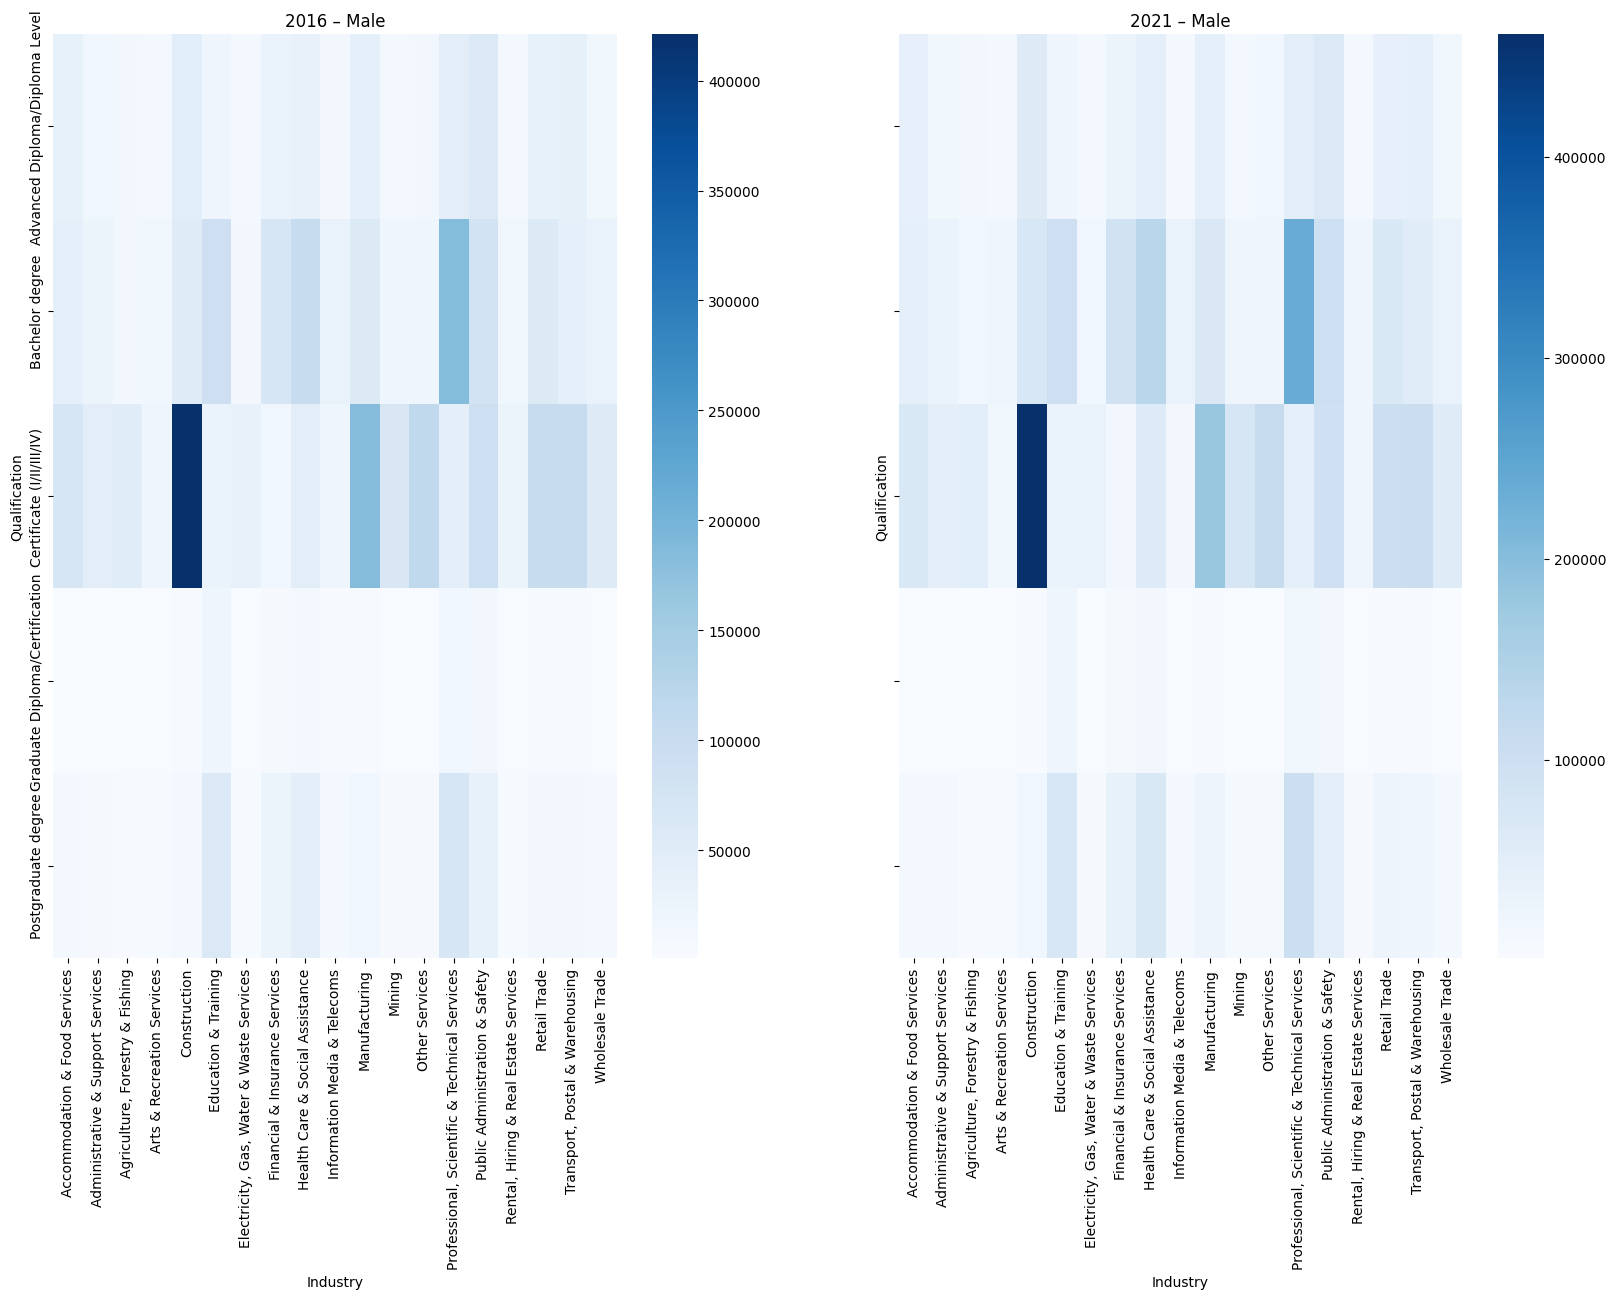

In [ ]:
# HEATMAPS SIDE BY SIDE MALE
df_2016_male = dfs["2016"]["Male"].iloc[:-1, :-1]
df_2021_male = dfs["2021"]["Male"].iloc[:-1, :-1]

fig, axes = plt.subplots(1, 2, figsize=(20, 12), sharey=True)

sns.heatmap(df_2016_male, cmap="Blues", annot=False, ax=axes[0])
axes[0].set_title("2016 – Male")

sns.heatmap(df_2021_male, cmap="Blues", annot=False, ax=axes[1])
axes[1].set_title("2021 – Male")

For males, the standout dark tile in 2016 is Construction × Certificate (I/II/III/IV), with sizeable blocks in Manufacturing × Certificate and Professional, Scientific & Technical Services × Bachelor. By 2021, Construction remains prominent at Certificate level, but there is visibly more colour in professional/knowledge intensive services notably Professional, Scientific & Technical Services (Bachelor/Postgraduate) and Education & Training (Postgraduate) relative to 2016. Visually we can confirm that industries focused on producing goods (e.g. Manufacturing and Mining) have lower shading to industries that provide services in the tertiary qualifications. Abstracting this means that realistically service-based industries would typically expect workers to have stronger/further education levels (e.g. Bachelors degree or above), whereas goods-producing industries typically expect workers to have (at least) a lower education level of a Certificate. We cannot see any noticeable clustering/groupings.

We can also change this heatmap code to instead show us the percentage change from the 2016 to 2021 Census data for the observed male population.

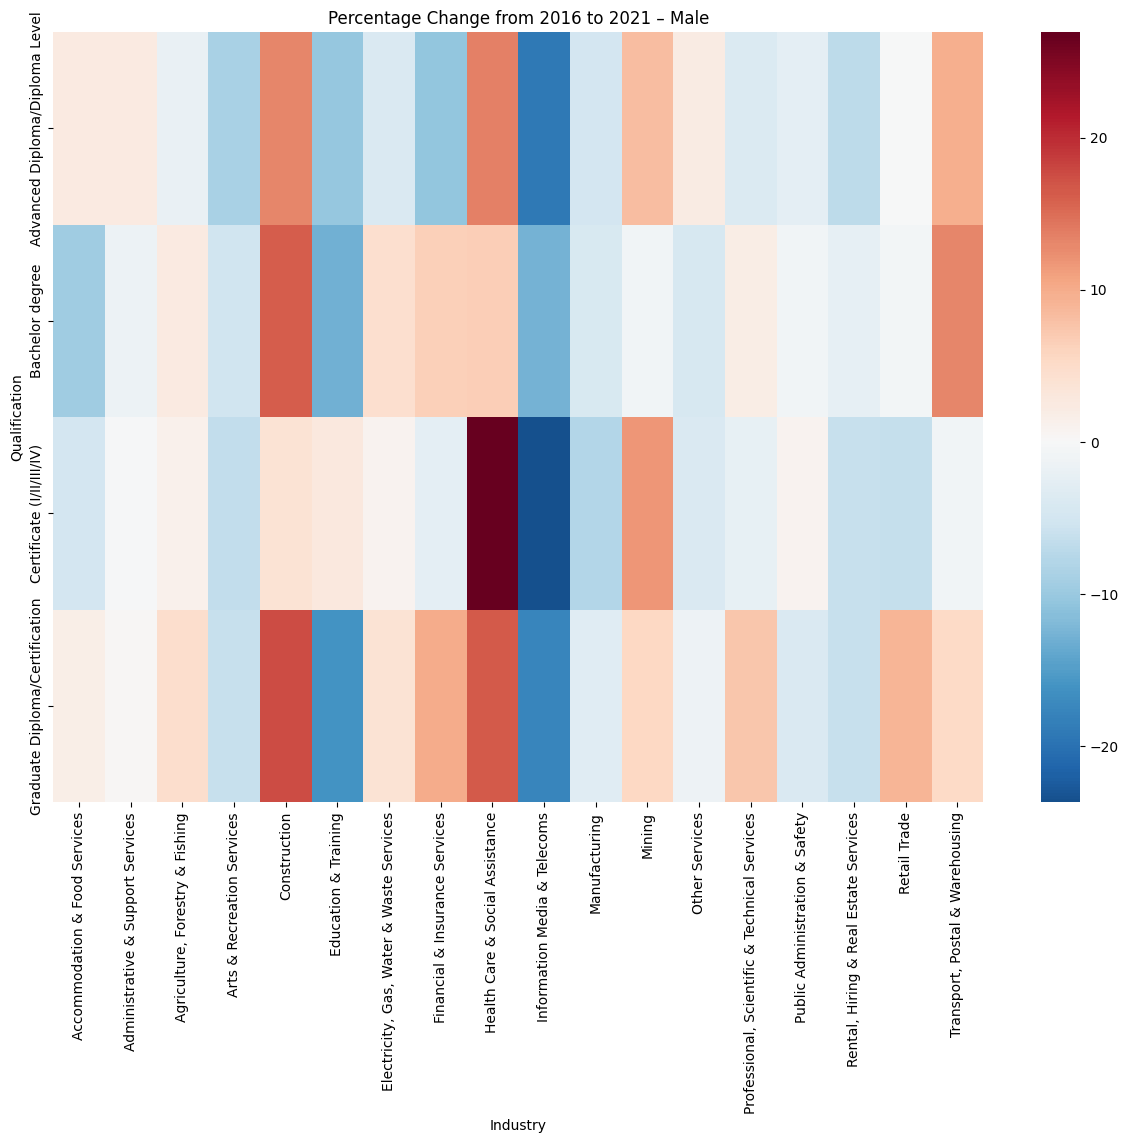

In [ ]:
# Male heatmap
df_2016_male = proportions["2016"]["Male"].iloc[:-1, :-1]
df_2021_male = proportions["2021"]["Male"].iloc[:-1, :-1]
df_2016_to_2021_male = (df_2021_male - df_2016_male) / df_2016_male * 100
plt.figure(figsize=(15, 10))

sns.heatmap(df_2016_to_2021_male, cmap="RdBu_r", center=0, annot=False)
plt.title("Percentage Change from 2016 to 2021 – Male")

plt.show()

The percentage change heatmap for males from 2016 to 2021 shows a mix of modest increases and decreases across industries and qualifications, with only a few stronger shifts (e.g., Construction, Health Care & Social Assistance and Information Media & Telecoms). However, most cells remain relatively light-coloured, making any subdued patterns hard to distinguish.

We now also perform again the same code for the females, in respective order.

Text(0.5, 1.0, '2021 – Female')

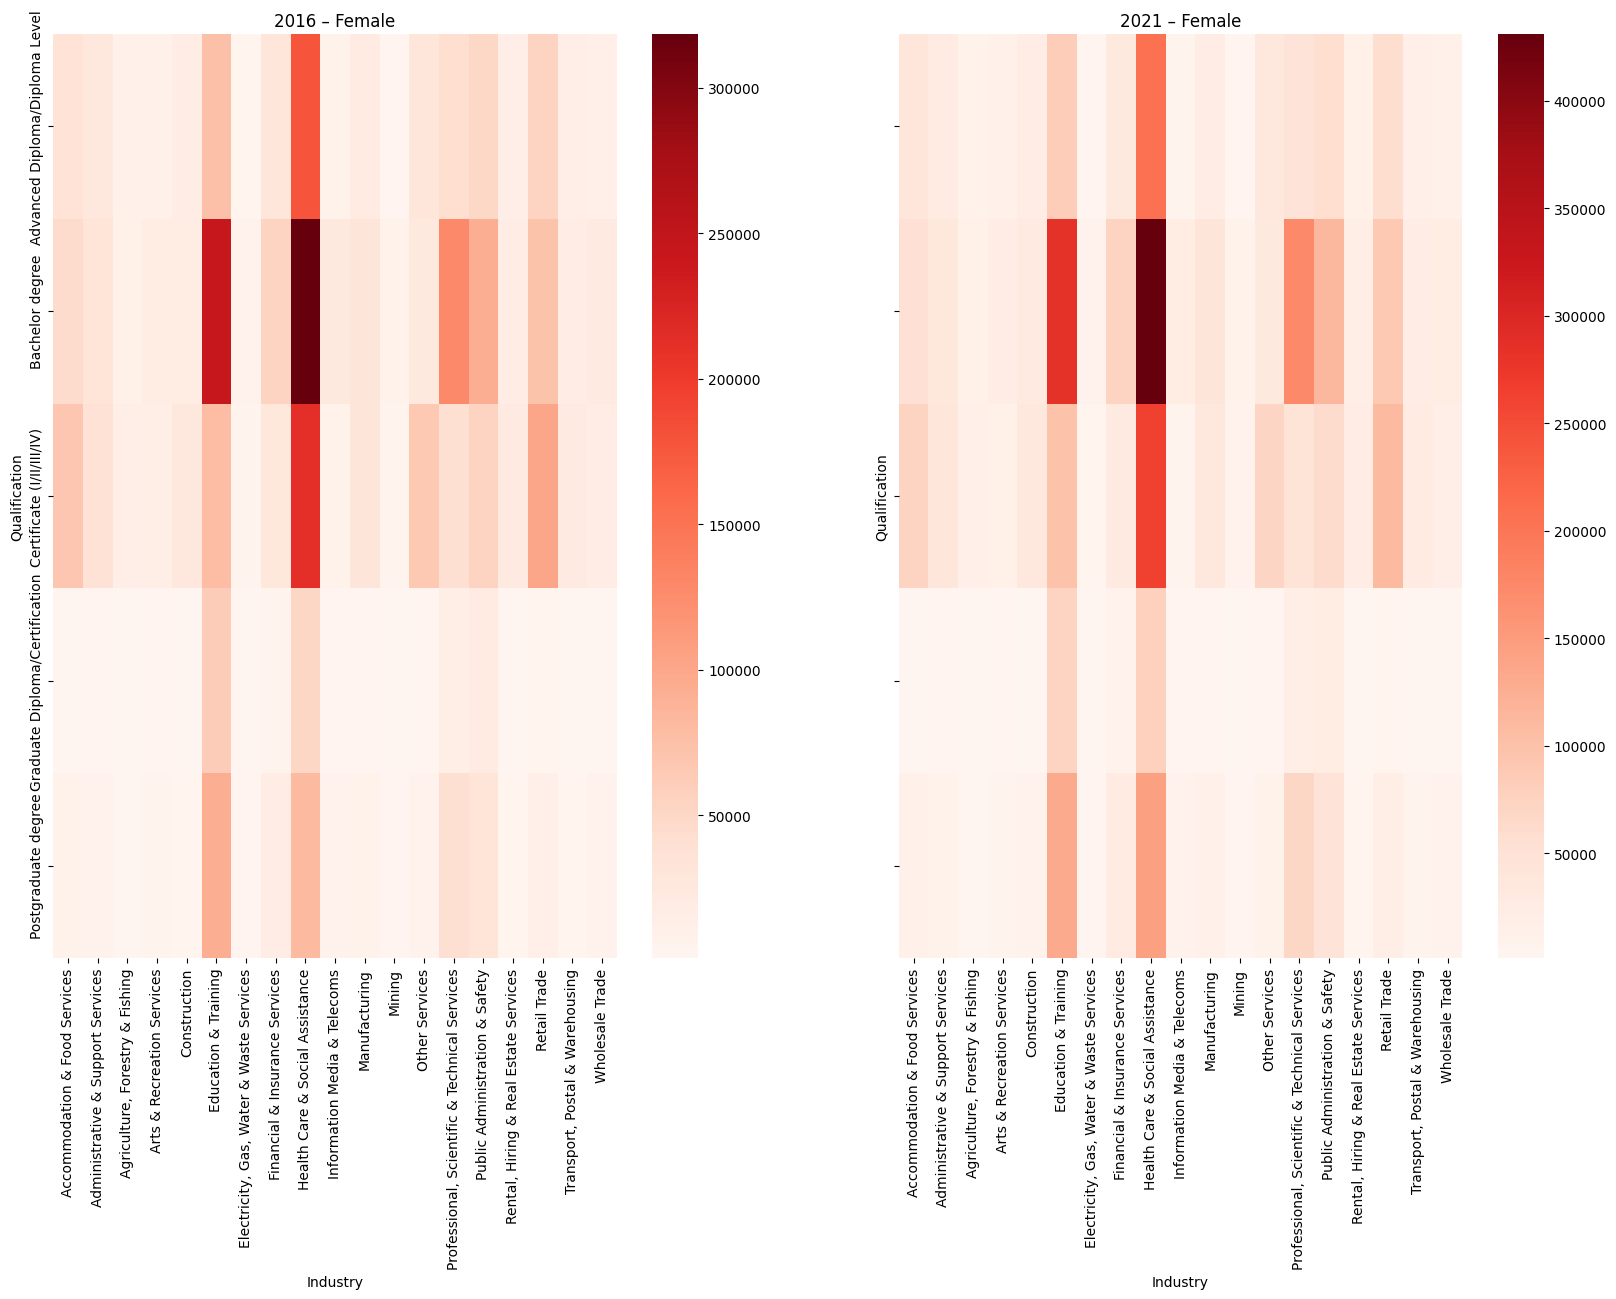

In [ ]:
# HEATMAPS SIDE BY SIDE FEMALE
df_2016_female = dfs["2016"]["Female"].iloc[:-1, :-1]
df_2021_female = dfs["2021"]["Female"].iloc[:-1, :-1]

fig, axes = plt.subplots(1, 2, figsize=(20, 12), sharey=True)

sns.heatmap(df_2016_female, cmap="Reds", annot=False, ax=axes[0])
axes[0].set_title("2016 – Female")

sns.heatmap(df_2021_female, cmap="Reds", annot=False, ax=axes[1])
axes[1].set_title("2021 – Female")

The female panels are dominated by very dark tiles in Education & Training and Health Care & Social Assistance. In 2016, Bachelor and Postgraduate qualifications in Education & Training are already high, and Health Care is dark across Certificate, Bachelor, and Postgraduate, indicating large headcounts at multiple qualification levels. In 2021 the intensity deepens in those same cells especially Health Care (Bachelor and Postgraduate) and Education & Training (Bachelor/Postgraduate) while several smaller industries remain pale across all qualifications. We also see more colour in Professional, Scientific & Technical Services (Postgraduate) than in 2016, consistent with a growing pool of tertiary-qualified female personnel in professional services. Overall, the female heatmaps show concentrations in services and education sectors, with 2021 intensifying those peaks. Again, no obvious groupings or clusterings are noticeable.

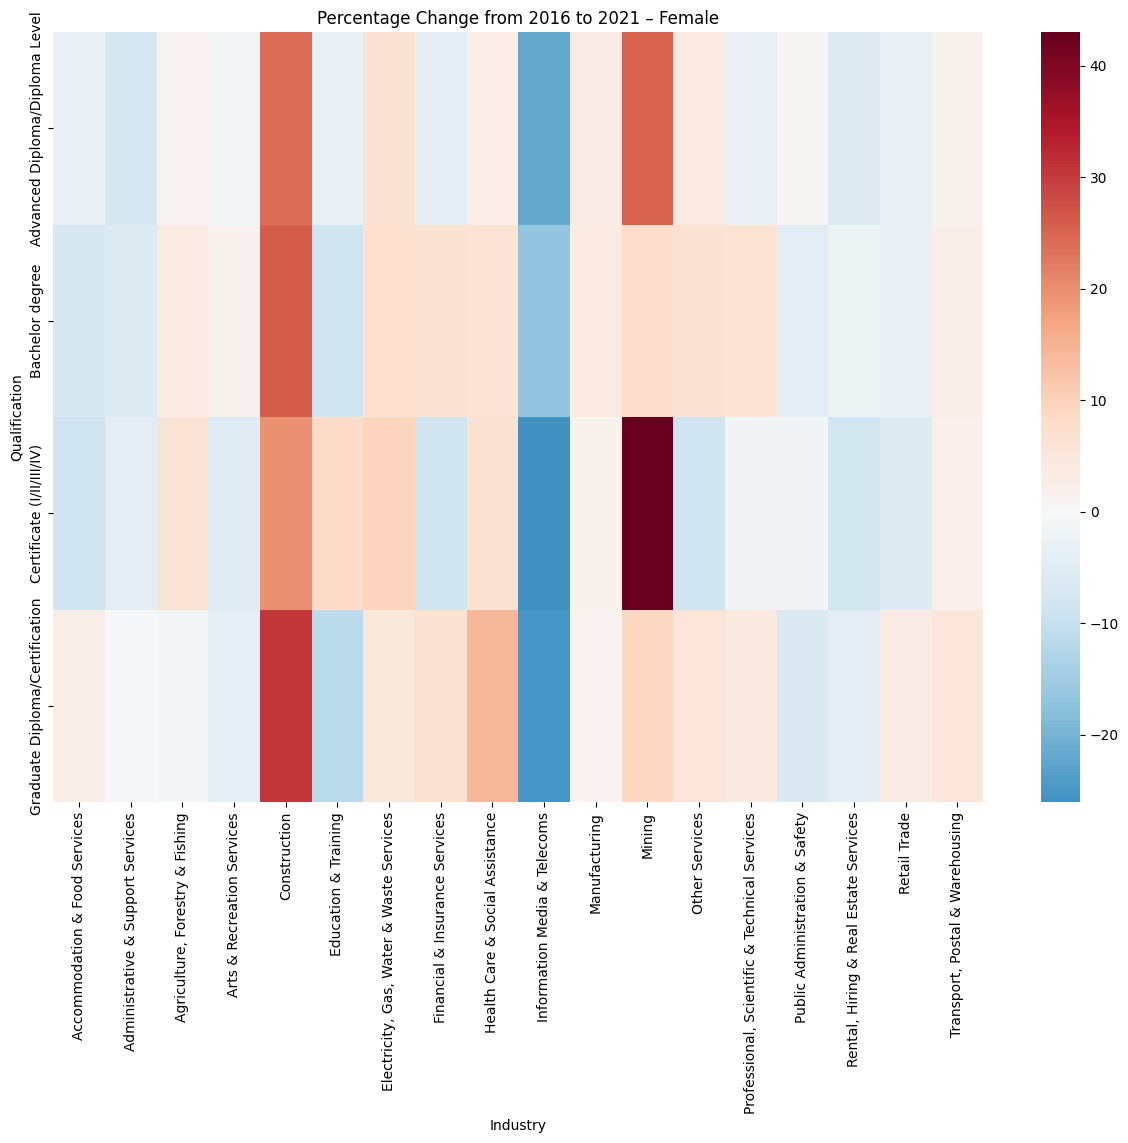

In [ ]:
# Female heatmap
df_2016_male = proportions["2016"]["Female"].iloc[:-1, :-1]
df_2021_male = proportions["2021"]["Female"].iloc[:-1, :-1]
df_2016_to_2021_male = (df_2021_male - df_2016_male) / df_2016_male * 100
plt.figure(figsize=(15, 10))

sns.heatmap(df_2016_to_2021_male, cmap="RdBu_r", center=0, annot=False)
plt.title("Percentage Change from 2016 to 2021 – Female")

plt.show()

The percentage change heatmap for females from 2016 to 2021 shows a mix of modest increases and decreases across industries and qualifications, with only a few stronger shifts (e.g., Construction, Mining and Information Media & Telecoms). However, most cells remain relatively pale, making broader patterns hard to distinguish at a glance.

It must be remembered that because we deal with categorical variables in heatmaps, they can be rearranged in any order to obtain a different "picture"/representation each time the code is run. Therefore, in our current configuration of the categorical variables, any subtle trends in the above Female and Male heatmaps are barely noticeable. As such, we will now choose to look at the observed populations from the Census with barplots instead, as they help us more obviously notice any trends or anomalies, as well as be less misleading in representing any relationships.

### Barplots

The first aspect of the data we will analyse is the distribution of industries that individuals with specific qualifications are employed in for males and females respectively.

Barplots are a useful way to display and compare counts of categorical variables. Note that the visualisations below use relative frequencies rather than absolute frequencies because this normalises the data to a common scale (values between 0 and 100) which allows the same industry to be compared easier across categories. Additionally, a grouped barplot is used which shows the relative frequencies for the two years side-by-side for each category. These two additional aspects make the data more comparable with each other.

The code cell below contains the function used to generate all the barplots in this report.

In [ ]:
# Create barplots
def make_barplots(df_2016, df_2021):
  quals = list(df_2016.index)
  industries = list(df_2016.columns)

  fig, axs = plt.subplots(5, 1, figsize=(10, 30))
  y = np.arange(len(industries))
  width = 0.4

  for i in range(len(df_2016)):
    qual, percents_2016, percents_2021 = quals[i], df_2016.iloc[i], df_2021.iloc[i]
    ax = axs[i]
    ax.barh(y + width / 2, percents_2016, width, label="2016")
    ax.barh(y - width / 2, percents_2021, width, label="2021")
    ax.set_title(qual)
    ax.set_ylabel("Industries")
    ax.set_xlabel("Relative Frequency (%)")
    ax.set_yticks(y, industries)
    ax.set_xticks(np.arange(0, 36))
    ax.legend()

  plt.show()

Running the code below generates a barplot for each qualification level as described earlier, for males which will then be analysed. Note that in this section of the analysis, emphasis will be placed on relative figures rather than precise absolute ones. Scroll through the figure below to view all the barplots.

Distribution of Industries of Employment for Highest Non-School Qualification of Males in 2016 v.s. 2021


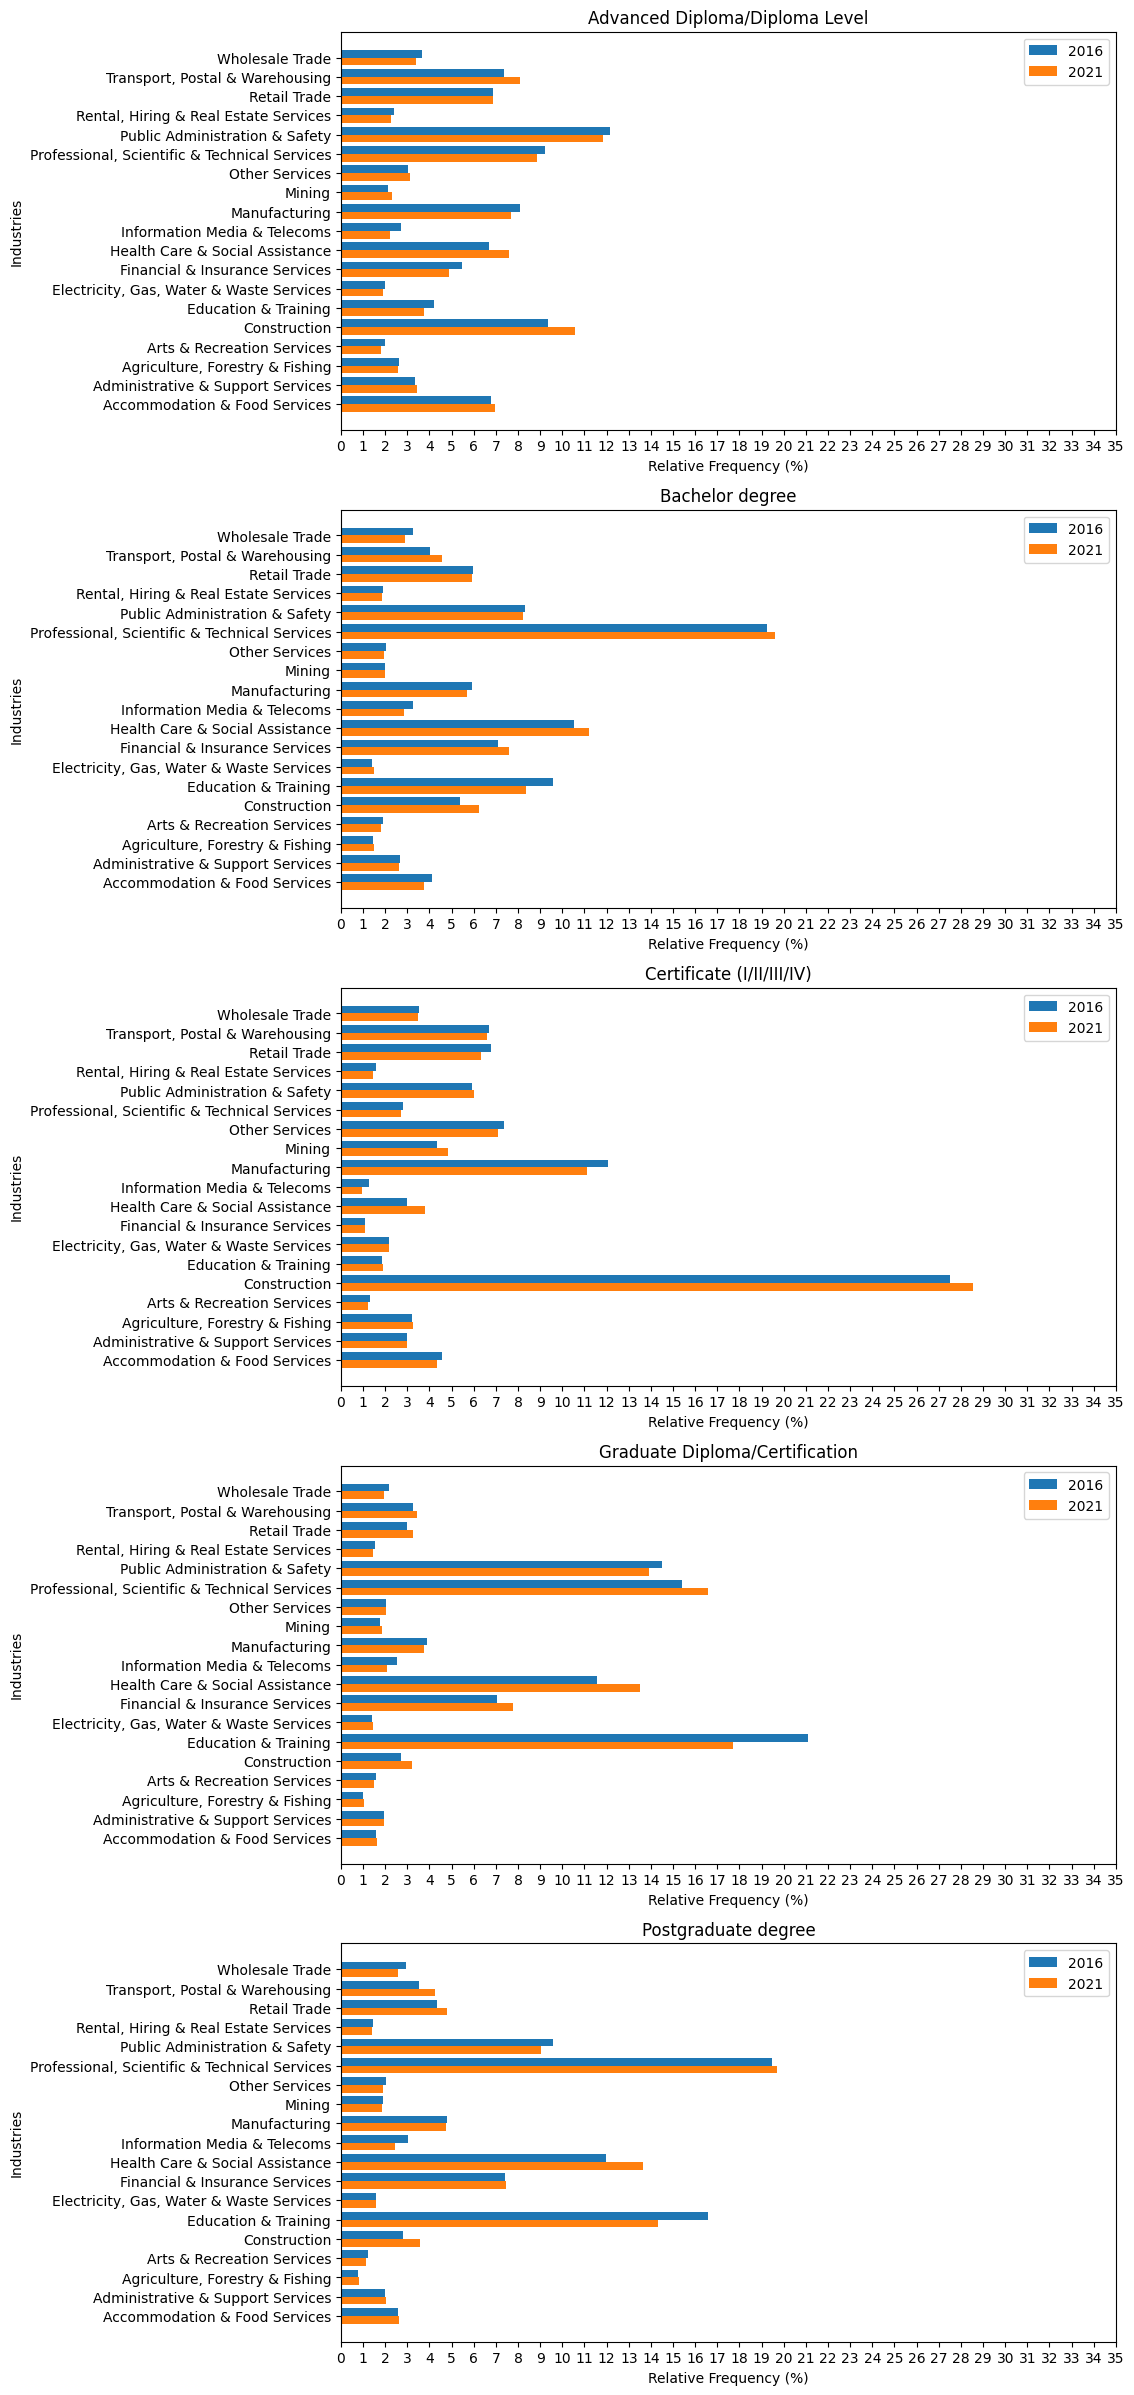

In [ ]:
# Male Barplots
print("Distribution of Industries of Employment for Highest Non-School Qualification of Males in 2016 v.s. 2021")
make_barplots(proportions["2016"]["Male"], proportions["2021"]["Male"])

None of the categories changed drastically for each education level as the relative rank of the industries for each qualification level was roughly identical for both the 2016 and 2021 Census for males. There are still interesting features of the data to note, related to the modal industry for each qualification level.

For male Certificate holders, 27-28% of them were employed in Construction during the 2016 Census with this figure being the largest by far, out of any category yet it still increased by roughly 1% over the next five years. Manufacturing also made up a large proportion of this subgroup with approximately 12% of them employed in this industry in 2016 although it decreased to around 11% by 2021. While not being the highest category for Advanced Diploma holders, Construction still ranked in second place at 9-10% in 2016 and increased to about 10-11% by the next Census. Instead, the most common industry for this qualification was Public Administration and Safety at 12-13% in 2016, while this decreased marginally by 2021. Construction ranked relatively low for males with university-level education. These findings suggest that non-university qualified males are more likely to pursue labour-intensive fields like Construction and Manufacturing than their non-university counterparts.

For both Bachelor and Postgraduate degrees, the industry with the highest proportion of male alumini was Professional, Scientific & Technical Services. Interestingly, both of their relative frequencies were roughly identical at 19-20% in 2016 and had a similar increase over the five-year period. For Graduate Diploma holders, this industry was the second highest at 15-16% in 2016 but it increased by about 1% by 2021. Instead, the modal qualification for Graduate Diploma holders was Education & Training at around 21% in 2016, although it decreased significantly to 17-18% over the next five years. The relative frequency of Professional, Scientific & Technical Services for degree holders was significantly higher than for Advanced Diploma and Certificate graduates, while the gap widened over the five-year interval. It seems there is a greater expectation for university-level education in this industry compared to other ones likely to acquire the necessary subject knowledge, but confirming this would require further investigation.

Overall, the peaks accord with common intuition as male university graduates are likely to pursue industries providing knowledge-intensive services like in the STEM fields, while their non-university counterparts are more likely to be employed in job where physical skills is a more critical aspect.

Given we have identically formatted data for females with the only difference being the raw counts and consequently the relative frequencies, we can produce the same plot for them and perform a similar analysis to above. The code below generates the same plots as above but for females. Note the scale on the x-axis has been slightly lengthened to account for the higher relative frequencies present.

Distribution of Industries of Employment for Highest Non-School Qualification of Females in 2016 v.s. 2021


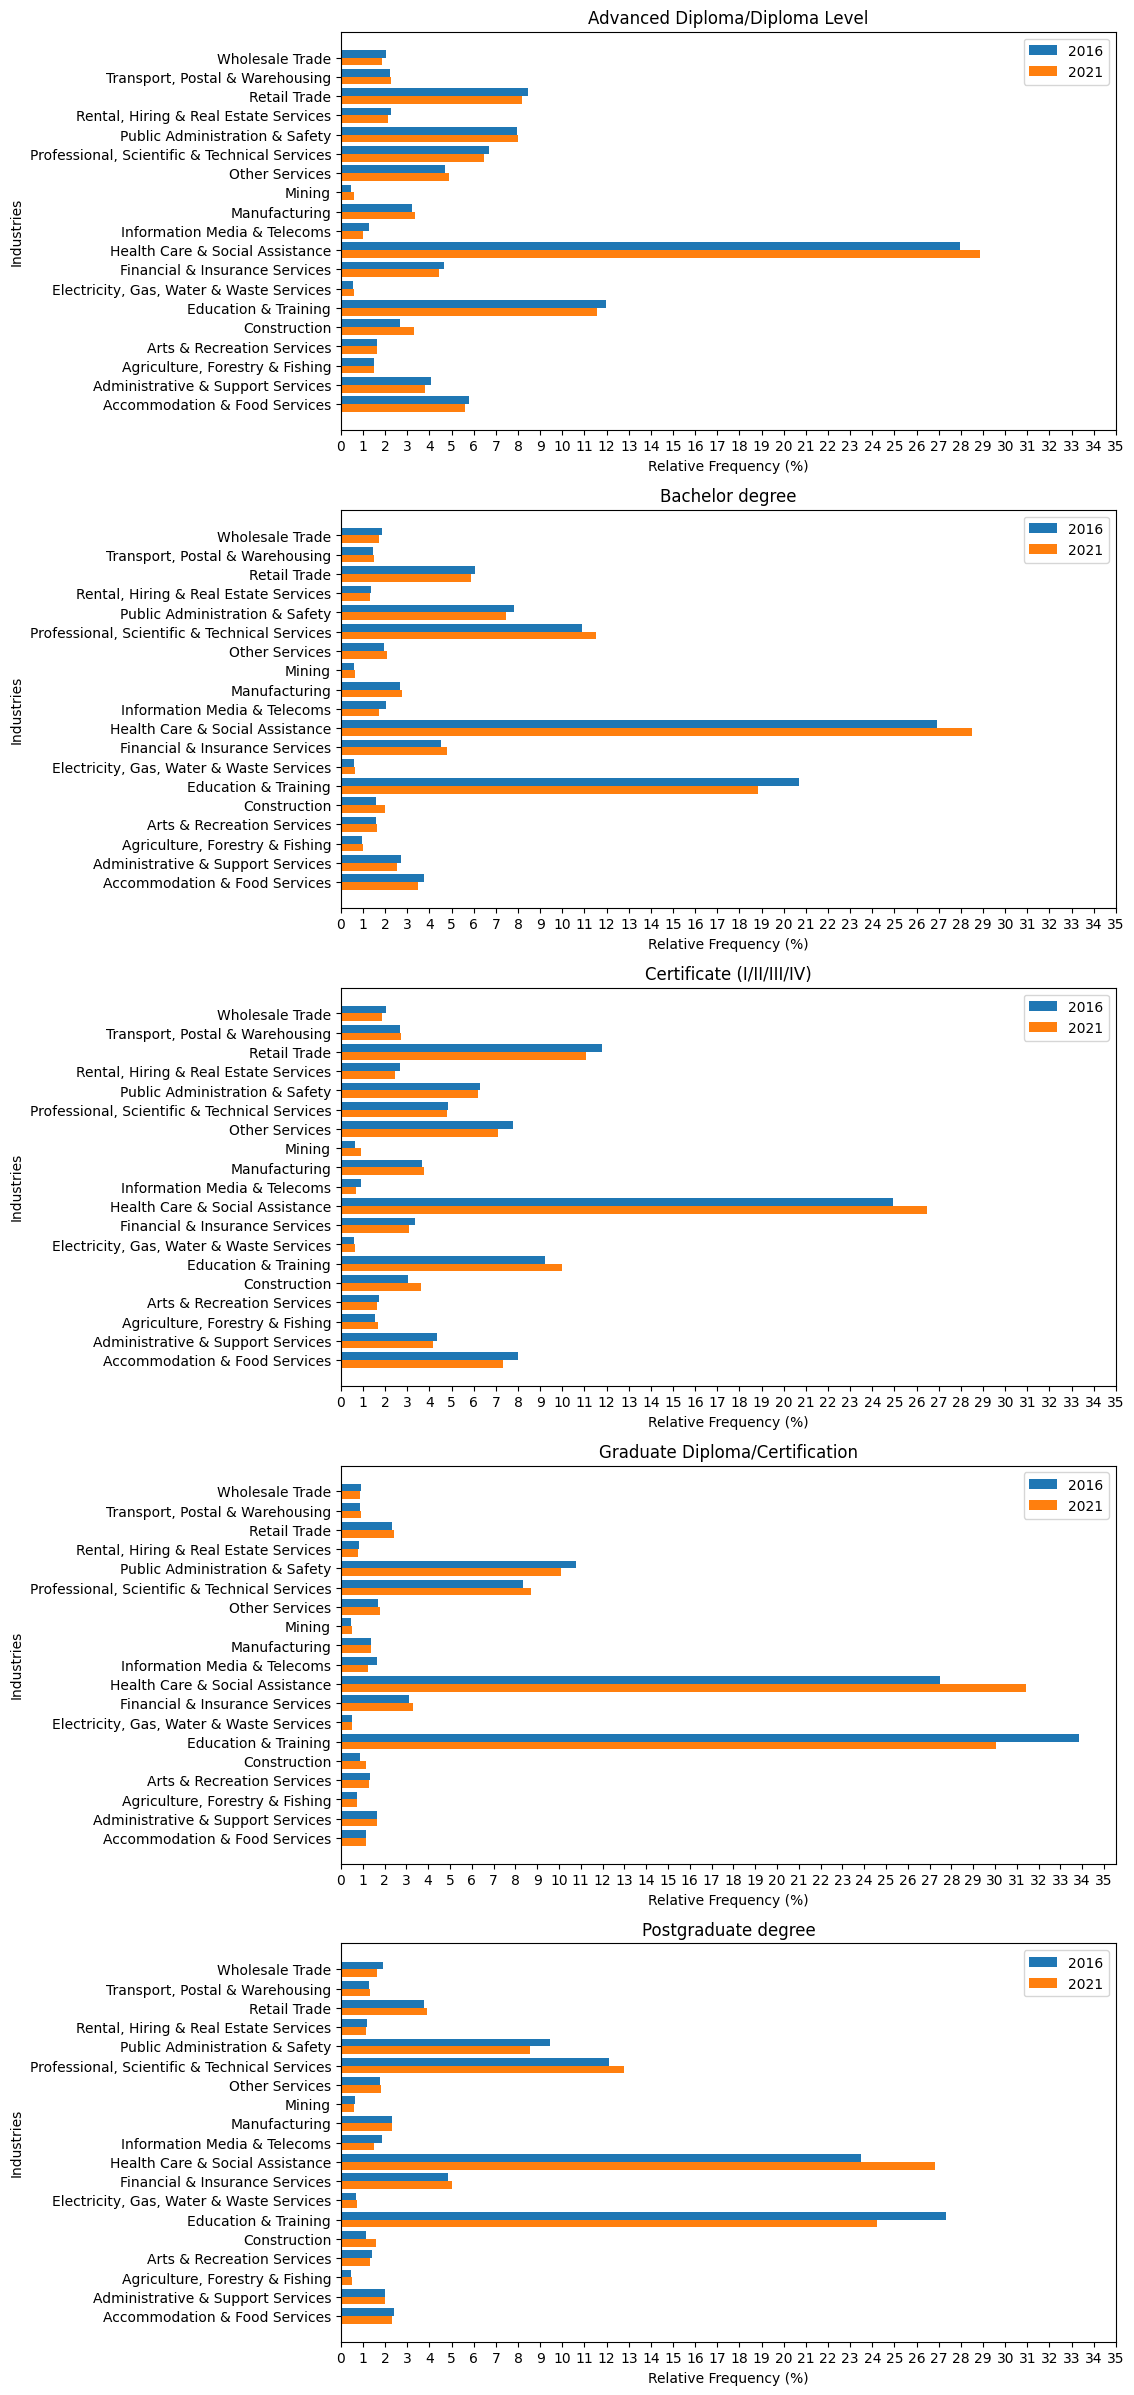

In [ ]:
# Female Barplots
print("Distribution of Industries of Employment for Highest Non-School Qualification of Females in 2016 v.s. 2021")
make_barplots(proportions["2016"]["Female"], proportions["2021"]["Female"])

Given the barplots above, it is evident that the distribution of industries that females work in differs considerably from males even for the same qualification level. For instance, the relative order of industries within a qualification level did change noticeably between the two Censuses. Again, we will examine the modal industry for each of the barplots.

For every qualification level, the most popular industry for females was Health Care & Social Assistance in 2021 while the relative frequencies for this category were all at least 23% and 26% in 2016 and 2021 respectively. The highest proportion of females employed in this industry was for Advanced Diploma holders at about 28% in 2016 while in 2021, it was for Graduate Diploma holders at 31-32%. In 2016, 33-34% of females with a Graduate Diploma and 27-28% with a Postgraduate degree were employed in Education & Training which was the highest category for that qualification level. These were the only instances where Health Care & Social Assistance is not the modal category in both the 2016 and 2021 Censuses for females. However for Graduate Diploma holders, the proportion dropped 4% while Health Care & Social Assistance increased by 4% over the five-year period and the same thing happened for Postgraduate alumni, meaning the Health Care & Social Assistance overtook Education & Training to become the modal category in both cases. It seems that no matter what level of qualification was being pursued, the industry that females were most likely to be employed in was Health Care & Social Assistance. Perhaps, the demand for health care professionals increased as a result of the COVID-19 pandemic. The male proportions for this industry consistently increased for different qualifications too, perhaps not as drastically. To confirm if the pandemic was the causal factor for this increase warrants further examination.

Interestingly, the Construction industry which was a dominant category for males who had a highest qualification of Advanced Diploma or Certification is not so for females. In 2016, only 2-3% and 3% of females whose highest qualification is Advanced Diploma and Certification respectively were currently employed in Construction at the time of the Census with these numbers only marginally increasing by 2021. Additionally while the relative frequencies of university-educated females employed in the Professional, Scientific and Technical Services industry rank highly and increased similarly to males, they were not quite as dominant categories for females.

Overall, the Health Care & Social Assistance industry was by far, the most popular industry for females no matter their education level while the distinction made between university-educated males and their non-university counterparts is less apparent for females.

### Biggest Changes

In [ ]:
# LOOP THAT COMPARES PROPORTIONS FOR 2016/2021, Male/Female, across all Industries.
# Call it twice, 1 for Males, 2 for Females
def compare_years(proportions: dict, year1: str = '2016', year2: str = '2021', gender: str ='Male'):
  data2016 = proportions[year1][gender]
  data2021 = proportions[year2][gender]

  # list of rows empty start
  rows = []
  for qualification in data2016.index:
    for industry in data2016.columns:
        value2016 = data2016.loc[qualification, industry]
        value2021 = data2021.loc[qualification, industry]
        difference = value2021 - value2016

        # debugging code
        # print(industry, qualification)


        # Debug printing for codecode
        '''
        print(f"{industry}, {qualification}, {gender}: "
              f"{value2016:.2f}% → {value2021:.2f}% (diff {difference:+.2f}%)")
        '''

        # print statement to demonstrate stuff
        '''
        print(f"This is the difference between {year1} and {year2} "
              f"for the gender of {gender} in the industry of {industry}: "
              f"{qualification} → {value2016:.2f}% vs {value2021:.2f}% (diff {difference:+.2f}%)")
        '''
        #.2f rounds to 2dp

      # appending stuff at the end back here
        rows.append({
                      "Industry": industry,
                      "Gender": gender,
                      "Qualification": qualification,
                      year1: value2016,
                      year2: value2021,
                      "Difference": difference
                  })
  return pd.DataFrame(rows)

# Shows all the percentage differances for males and females 2016-2021
df_male = compare_years(proportions, "2016", "2021", "Male")
df_female = compare_years(proportions, "2016", "2021", "Female")
# df_persons = compare_years(proportions, "2016", "2021", "Persons")



# Show top 10 largest differences (absolute) for males and females
top10_male = df_male.reindex(df_male["Difference"].abs().sort_values(ascending=False).index).head(10)
top10_female = df_female.reindex(df_female["Difference"].abs().sort_values(ascending=False).index).head(10)

In [ ]:
# prints formatted Top K changes table
def show_top_tables(df, title="", k=10, y1="2016", y2="2021"):
    # Create a working copy with a clearer column name and only the columns we want to show
    base = df.rename(columns={"Difference": "Change in Percentage"})[
        ["Qualification","Industry","Gender", y1, y2, "Change in Percentage"]
    ]

    # Sort rows by absolute size of the change (biggest ups or downs first),
    # then take the top k rows. Finally, reindex to apply sorted order to DataFrame.
    top_abs = base.reindex(base["Change in Percentage"].abs().sort_values(ascending=False).index).head(k)

    display(
        top_abs.style
            # Format the year columns as percentages with 2 decimals,
            # and the change column as signed percentage points (e.g., +1.23 pp)
            .format({y1:"{:.2f}%", y2:"{:.2f}%", "Change in Percentage":"{:+.2f} pp"})
            # Add a green to red background gradient only to the change column
            .background_gradient(subset=["Change in Percentage"], cmap="RdYlGn")
            # Hide the DataFrame's numeric index column to keep the table clean
            .hide(axis="index")
            # Adds title
            .set_caption(f"{title} — Top {k} changes by Percentage")
    )

# Show the top 10 changes for males
show_top_tables(df_male,   title="Male 2016-2021",   k=10)

print("\n")

# Show the top 10 changes for females
show_top_tables(df_female, title="Female 2016-2021", k=10)




Qualification,Industry,Gender,2016,2021,Change in Percentage
Graduate Diploma/Certification,Education & Training,Male,21.08%,17.71%,-3.38 pp
Postgraduate degree,Education & Training,Male,16.57%,14.34%,-2.23 pp
Graduate Diploma/Certification,Health Care & Social Assistance,Male,11.56%,13.49%,+1.92 pp
Postgraduate degree,Health Care & Social Assistance,Male,11.99%,13.65%,+1.67 pp
Advanced Diploma/Diploma Level,Construction,Male,9.33%,10.57%,+1.24 pp
Bachelor degree,Education & Training,Male,9.58%,8.35%,-1.24 pp
Graduate Diploma/Certification,"Professional, Scientific & Technical Services",Male,15.42%,16.59%,+1.17 pp
Certificate (I/II/III/IV),Construction,Male,27.49%,28.55%,+1.06 pp
Certificate (I/II/III/IV),Manufacturing,Male,12.06%,11.11%,-0.94 pp
Advanced Diploma/Diploma Level,Health Care & Social Assistance,Male,6.68%,7.58%,+0.90 pp


Qualification,Industry,Gender,2016,2021,Change in Percentage
Graduate Diploma/Certification,Health Care & Social Assistance,Female,27.48%,31.42%,+3.93 pp
Graduate Diploma/Certification,Education & Training,Female,33.86%,30.05%,-3.81 pp
Postgraduate degree,Health Care & Social Assistance,Female,23.47%,26.81%,+3.34 pp
Postgraduate degree,Education & Training,Female,27.32%,24.22%,-3.11 pp
Bachelor degree,Education & Training,Female,20.69%,18.85%,-1.85 pp
Bachelor degree,Health Care & Social Assistance,Female,26.92%,28.51%,+1.59 pp
Certificate (I/II/III/IV),Health Care & Social Assistance,Female,24.92%,26.46%,+1.54 pp
Advanced Diploma/Diploma Level,Health Care & Social Assistance,Female,27.94%,28.85%,+0.91 pp
Postgraduate degree,Public Administration & Safety,Female,9.43%,8.55%,-0.88 pp
Certificate (I/II/III/IV),Education & Training,Female,9.22%,10.00%,+0.78 pp


For males, the ten largest moves in percentage-point share were:
- Graduate Diploma/Certification in Education & Training −3.38 pp;
- Postgraduate in Education & Training −2.23 pp;
- Graduate Diploma/Certification in Health Care & Social Assistance (HCSA) +1.92 pp;
- Postgraduate in HCSA +1.67 pp;
- Advanced Diploma/Diploma in Construction +1.24 pp;
- Bachelor in Education & Training −1.24 pp;
- Graduate Diploma/Certification in Professional, Scientific & Technical - Services +1.17 pp;
- Certificate I–IV in Construction +1.06 pp;
- Certificate I–IV in Manufacturing −0.94 pp;
- Advanced Diploma/Diploma in HCSA +0.90 pp.


For females, the top ten were:
- Graduate Diploma/Certification in HCSA +3.93 pp;
- Graduate Diploma/Certification in Education & Training −3.81 pp;
- Postgraduate in HCSA +3.34 pp;
- Postgraduate in Education & Training −3.11 pp;
- Bachelor in Education & Training −1.85 pp;
- Bachelor in HCSA +1.59 pp;
- Certificate I–IV in HCSA +1.54 pp;
- Advanced Diploma/Diploma in HCSA +0.91 pp;
- Postgraduate in Public Administration & Safety −0.88 pp;
- Certificate I–IV in Education & Training +0.78 pp.


As we notice, the female shifts are larger than the males. Both sexes move away from Education & Training at higher qualifications toward HCSA, but men additionally show a vocational tilt toward Construction and a smaller Graduate-Diploma rise in Professional Services, whereas women’s increases are concentrated in HCSA across certificates, bachelor, and postgraduate levels.

### Chi-Square Testing

Given all the trends we have uncovered, we should now determine whether there is a genuine association between our two variables of interest at the time of the Census in both 2016 and 2021 for males and females respectively. Chi-square testing is a type of one-sided hypothesis testing suitable for determining whether two categorical variables are independent or not ([Chi-Square Test](https://www.youtube.com/watch?v=Jb9sxlnhZMo)). Both the highest non-school qualification of an individual and the industry they were employed in at the time of the Census are categorical variables (although the former is ordinal while the latter is nominal). Hence, chi-square tests of independence can be performed on the data sourced and cleaned earlier.

The null hypothesis (H0) is that the highest non-school qualification is independent of the current industry an individual works in for both males and females respectively. The alternate hypothesis (H1) is that the highest non-school qualification is dependent on the current industry an individual works in for both males and females respectively. We will use the significance level of alpha = 0.05, meaning a p-value less than or equal to it is statistically significant (i.e. we can be confident that there is a dependent relationship between the two variables in question). The Chi-Square Test does not determine what this dependent relationship is exactly, or whether only these two variables are correlated. We cannot determine these aforementioned things because of the nature of our data.

The code below performs a chi-square test for each of the four contingency tables generated during data cleaning, generating p-values we can use to test our hypothesis.

In [ ]:
# Chi square test of independence
def chi_square_test(table: pd.DataFrame):
    """
    Runs chi-square test of independence on a contingency table.

    Returns:
      - chi2:      Chi-square statistic
      - p:         p-value (small -> reject independence)
      - dof:       degrees of freedom = (R-1)*(C-1)
      - n:         total sample size (sum of all cells)
    """
    observed = table.values
    chi2, p, dof, expected = chi2_contingency(observed, correction=False)  # no Yates correction for >2x2
    n = observed.sum()
    # dont need to do any assumption checks as sample size so large, assumptions will hold

    return {
        "chi2": chi2, "p": p, "dof": dof, "n": n,
        "expected": pd.DataFrame(expected, index=table.index, columns=table.columns)}


# Automation of analysis for 2016 & 2021, Male and Female groups
groups = [
    ("2016", "Male"),
    ("2021", "Male"),
    ("2016", "Female"),
    ("2021", "Female"),
]

rows = []      # list, one summary row/group
tables = {}    # dictionary with each group's cleaned contingency table

for yr, sx in groups: # for pair (year, sex) in groups list
    # Build contingency table
    tab = dfs[yr][sx].iloc[:-1, :-1]

    # Run chi-square
    res = chi_square_test(tab)

    # Save a compact summary row
    rows.append({
        "Year": yr,
        "Sex": sx,
        "N": res["n"], # total count
        "df": res["dof"], # degrees of freedom
        "Chi^2": round(res["chi2"], 6), # chi-square statistic
        "p-value": round(res["p"], 6), # p-value
    })

    # Store table to plot later
    # In here, we first take the tab we built in the loop, and then we assign it
    # to a generated key of "{yr} – {sx}"" e.g. "2016 - Males"
    # NOT THE OTHER WAY AROUND! because if so, then it tries to retrieve instead of assign,
    # and that throws a Key Value error.
    tables[f"{yr} – {sx}"] = tab

    # Now print to console the results
    print(
        f"{yr} – {sx}: n={res['n']:,} df={res['dof']}  "
        f"chi2={res['chi2']:.6f}  p={res['p']:.6f}"
    )



# Final summary table across all groups
summary_df = pd.DataFrame(rows).sort_values(["Sex", "Year"])
print("\nSummary:\n", summary_df)


# - Significant p-values -> reject independence -> Industry and Qualification are associated.

2016 – Male: n=3,468,539 df=72  chi2=947893.767887  p=0.000000
2021 – Male: n=4,030,083 df=72  chi2=1050947.335214  p=0.000000
2016 – Female: n=3,195,512 df=72  chi2=301135.637139  p=0.000000
2021 – Female: n=4,010,555 df=72  chi2=328092.872597  p=0.000000

Summary:
    Year     Sex        N  df         Chi^2  p-value
2  2016  Female  3195512  72  3.011356e+05      0.0
3  2021  Female  4010555  72  3.280929e+05      0.0
0  2016    Male  3468539  72  9.478938e+05      0.0
1  2021    Male  4030083  72  1.050947e+06      0.0


Based on the current grouped counts (Industry x Highest non-school Qualification), analysed separately by sex and year, the Pearson’s chi-square tests have rejected independence for all four contingency tables (df = 72), as:
- 2016 males chi-square = 9.48e+5 (n = 3,468,539), p-value < 0.001;
- 2021 males chi-square = 1.05e+6 (n = 4,030,083), p-value < 0.001;
- 2016 females chi-square = 3.01e+5 (n = 3,195,512), p-value < 0.001;
- 2021 females chi-square = 3.28e+5 (n = 4,010,555), p-value < 0.001.

As we have large, census-scale samples we emphasise practical strength using chi-square value per observation: males 0.273 -> 0.261, females 0.094 -> 0.082 (2016->2021). This indicates the association is stronger for males and slightly weaker in 2021 for both sexes. These results are consistent with a dependence between highest non-school qualification and industry of employment.


It is important to note that these results demonstrate association, not causation. They are conditional on this table and do not adjust for other variables (e.g., age structure, occupation within industry, region, hours worked, migration, or coding/weight changes). Modelling those factors could change both the apparent relationships and the p-values. The chi-square test also treats qualification levels as nominal and assumes independent observations.

## Conclusion

To conclude, we posed the research question, *What trends exist between a person's highest non-school qualification and the industry they find themselves working in for males and females respectively and how has it changed from 2016 to 2021?* Through our analysis we have successfully addressed it.

We were able to establish a statistically significant association between an individual's highest non-school qualification and their industry of employment for both genders, in both the 2016 and 2021 Census datasets. This was confirmed by the very low p-values (p < 0.001) from the Chi-Square Test of Independence performed. We therefore rejected our null hypothesis and concluded that there is in fact a non-random relationship between industry of employment and a person's highest non-school qualification (i.e. the two variables are not independent).

We can derive from this that the industry a person works in is significantly influenced by, at least, the amount of education/experience they have received past highschool. Additionally, using the chi square test we were able to note that this strong relationship between the two analysed demographics were much stronger for Australian males than females.

Overall, our findings have pointed towards a gradual shift in the Australian workforce from 2016 to 2021: more degree and postgraduate qualifications are linked with growth in service-based industries such as health and education, while certificate-based qualifications have slightly declined in the commodity-producing sectors of construction, manufacturing and transport. Additionally, utilising the chi square test we were able to note that this strong relationship between the two analysed demographics was much stronger for Australian males than Females. For females specifically, their qualifications seemed to play an increasingly important role in accessing higher-skilled industries.


We noted that our analysis does not, and cannot, prove causation, and it does not account for factors such as age, occupation or differences in the different Australian states. It does however demonstrate the strong connection between education and industry, and how this relationship continuously evolves. Further studies into this sector of research can perhaps, given more detailed datasets and developing more powerful models, provide insight into how education continues to mould the Australian labour market.

## References

Australian Bureau of Statistics. (2022a). 2021 Census: Education and training. https://www.abs.gov.au/statistics/people/education/education-and-training-census/2021

Australian Bureau of Statistics. (2022b). 2021 Census: Qualifications and work. https://www.abs.gov.au/statistics/people/education/qualifications-and-work/2022-23